# Обработка данных, полученных с программы

In [1]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [2]:
def psi_f(x):
    return np.exp(-x**2/2)/np.sqrt(np.sqrt(np.pi))

def integrate_hist(hist, bin_edges):
    integral = 0
    for i in range(len(hist)):
        integral += hist[i]*(bin_edges[i+1] - bin_edges[i])
    return integral

def distr(df):
    pedestrians, bin_edges = np.histogram(df, bins = 10)
    #print bin_edges
    
    width = bin_edges[1] - bin_edges[0]
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width)
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(-4, 4, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi_sq, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()

## Данные без первых 10%

In [11]:
frame = pd.read_csv('output.csv')
#frame90 = frame.drop(frame.index[0:frame.shape[0]/10])
frame.head()

,x
0,-0.712085
1,-0.956885
2,-0.580688
3,0.887915
4,-0.112085


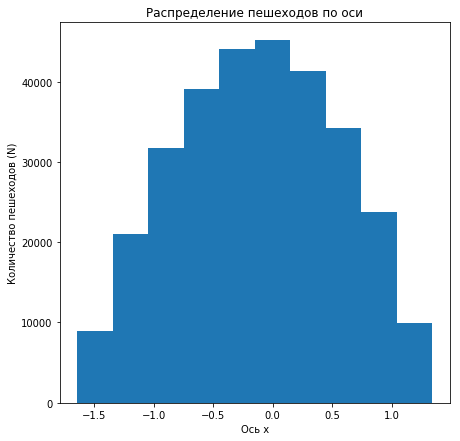

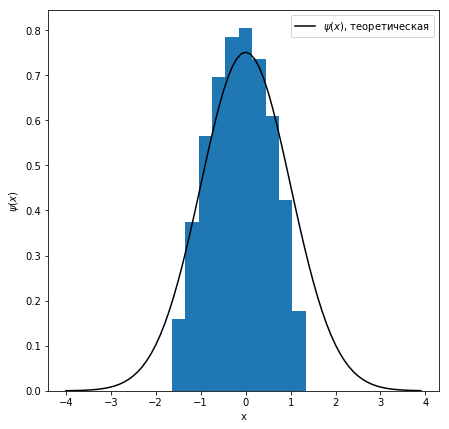

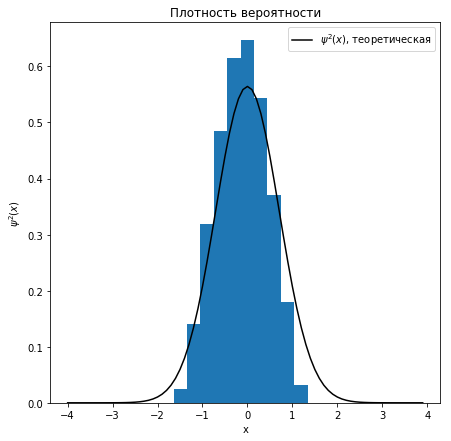

In [12]:
distr(frame)


## Анализ первых 10% данных

In [19]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E_r'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E_r'.decode('utf-8'))
    plt.title('Зависимость опорного потенциала от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()

In [21]:
frameNE = pd.read_csv('D:\Backup(work)\data_output\output(1000000x4000)_ds=0.04\outputNE.csv')
#frame10NE = frameNE.drop(frameNE.index[frameNE.shape[0]/10:frameNE.shape[0]])

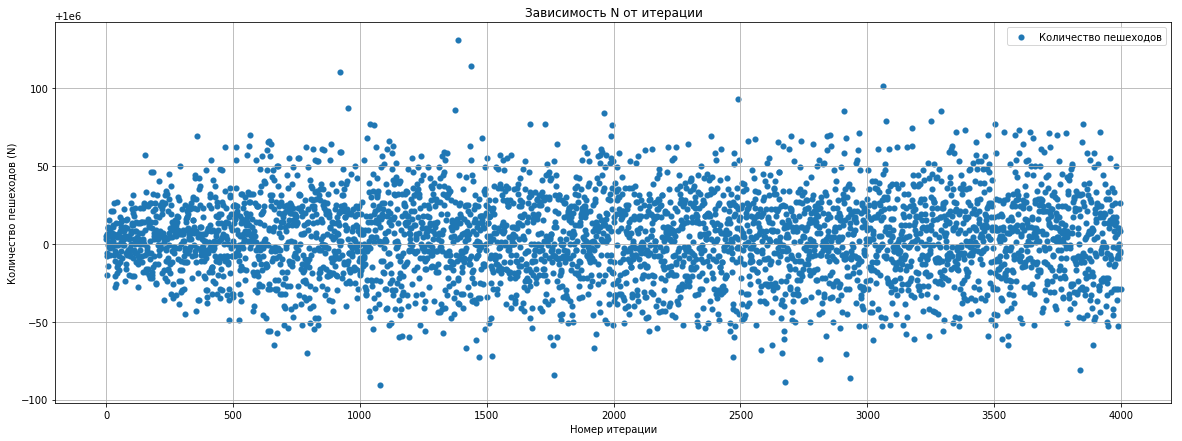

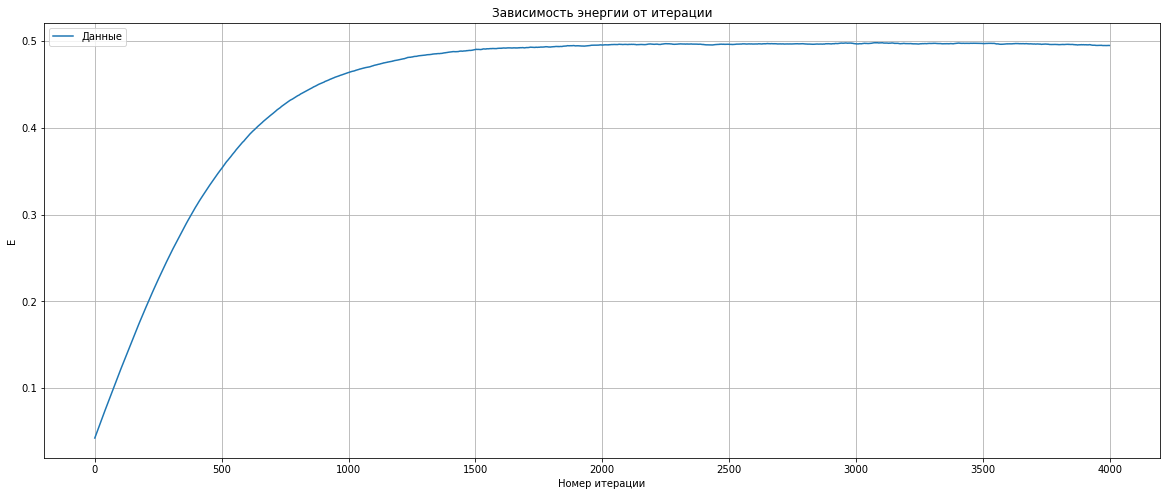

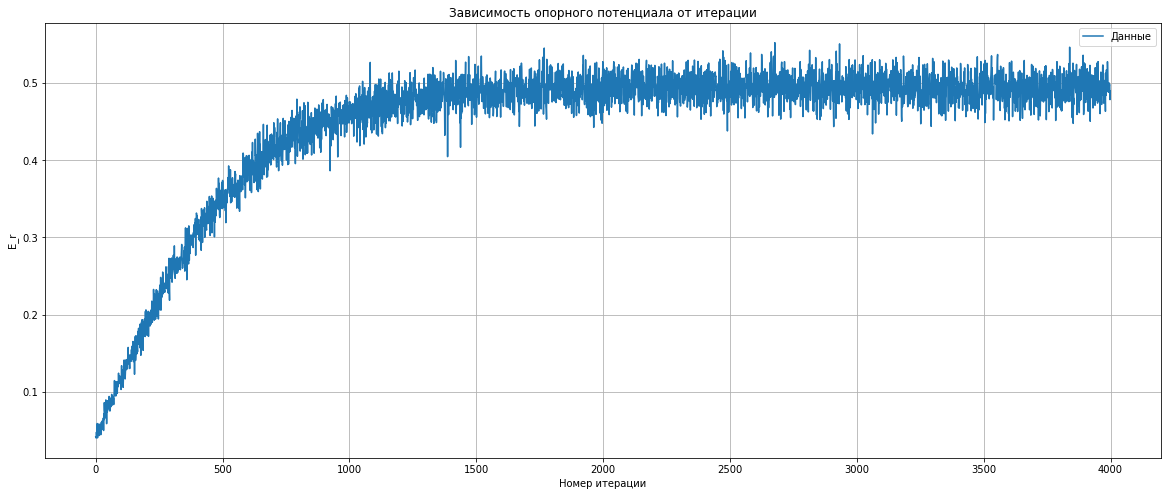

In [22]:
drawNE(frameNE)

In [24]:
frameNE[2500:]['E'].mean()

0.4966417280000002

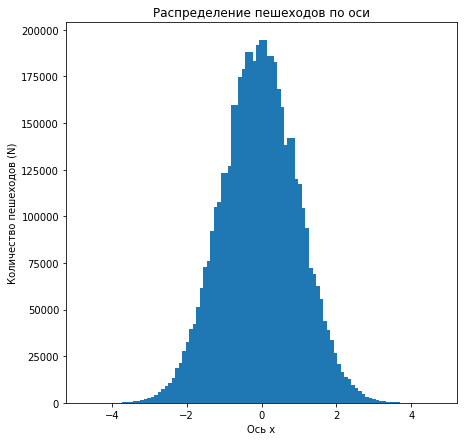

1.0


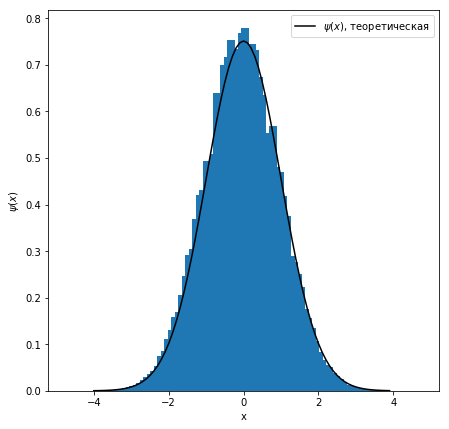

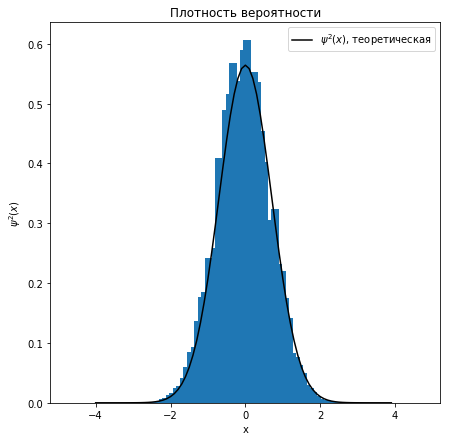

In [9]:
frame10 = frame.drop(frame.index[frame.shape[0]/10:frame.shape[0]])
distr(frame10)

# Анализ большого датасета (5000 частиц, 10000 итераций)
## Данные без первых 10%

In [26]:
frame = pd.read_csv('data_output/output(5000x10000)/output.csv')
frame90 = frame.drop(frame.index[0:frame.shape[0]/10])


TypeError: 'tuple' object is not callable

In [27]:
frame.shape

(50000000, 1)

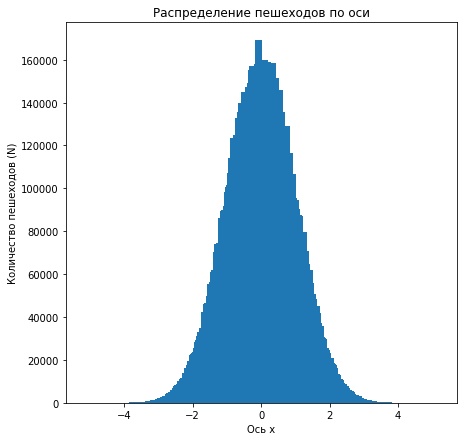

1.0


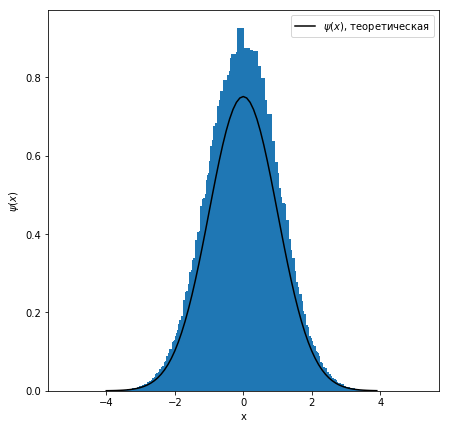

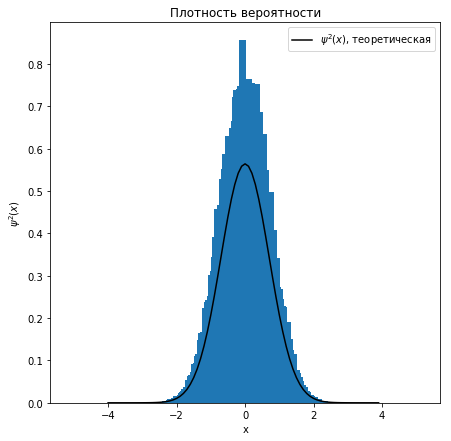

In [32]:
distr(frame90)


## Анализ первых 10% данных

In [12]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
frameNE = pd.read_csv('data_output/output(5000x10000)/outputNE.csv')
frame10NE = frameNE.drop(frameNE.index[frameNE.shape[0]/10:frameNE.shape[0]])

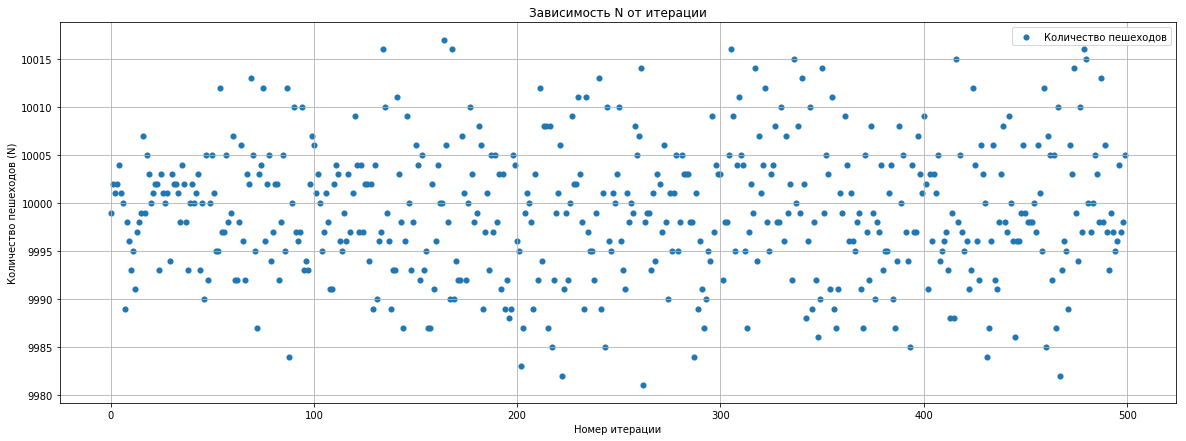

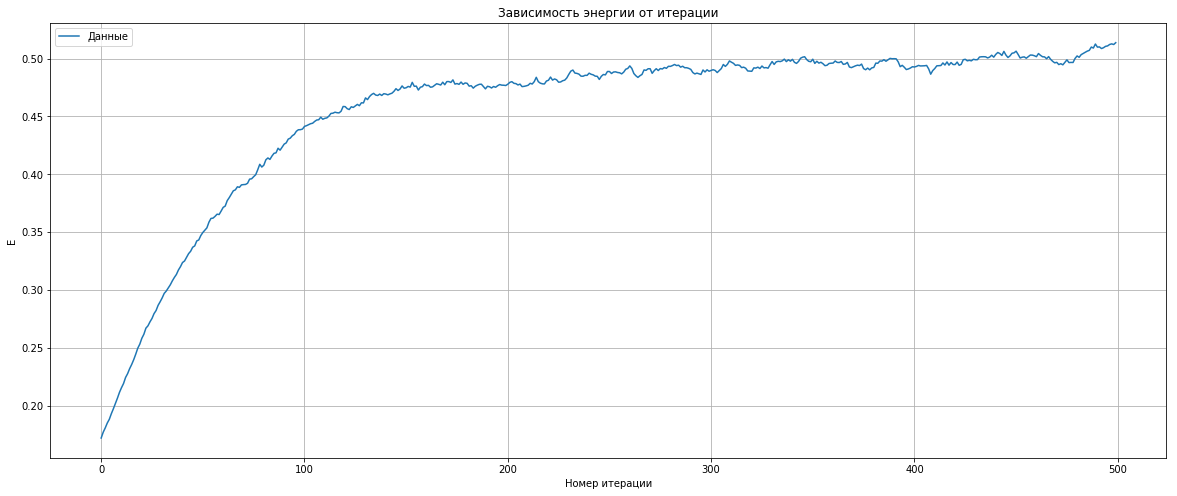

In [29]:
drawNE(frame10NE)

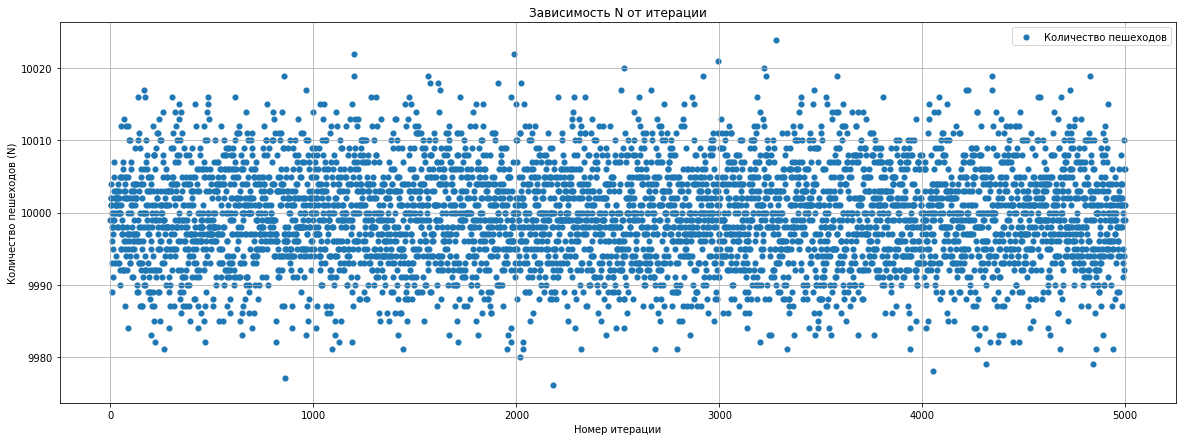

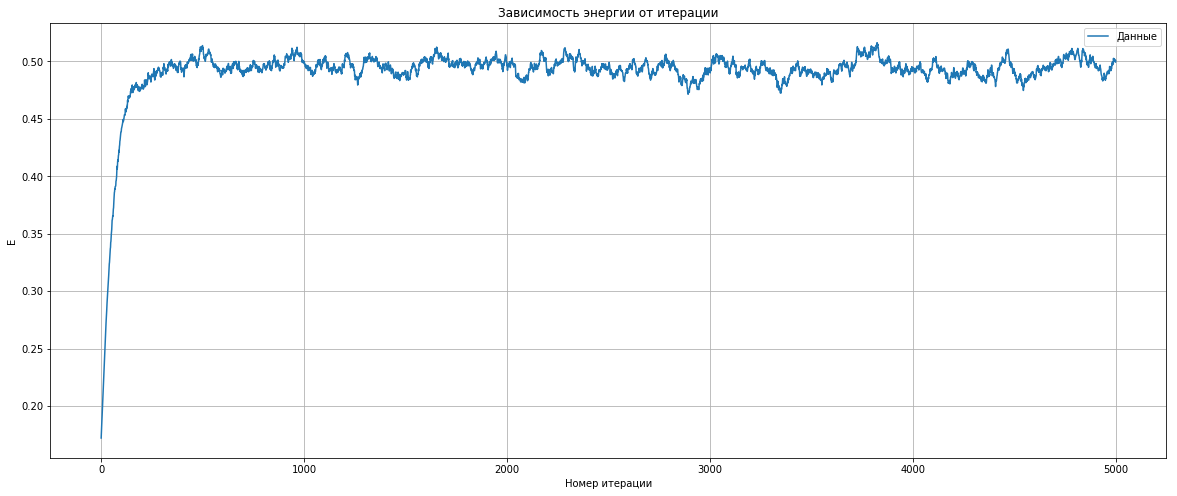

In [15]:
drawNE(frameNE)

In [28]:
frameNE.shape

(5000, 2)

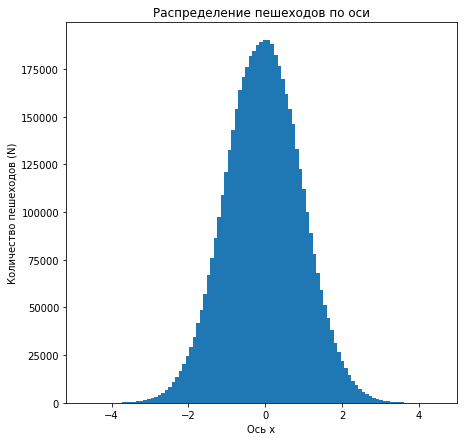

1.0


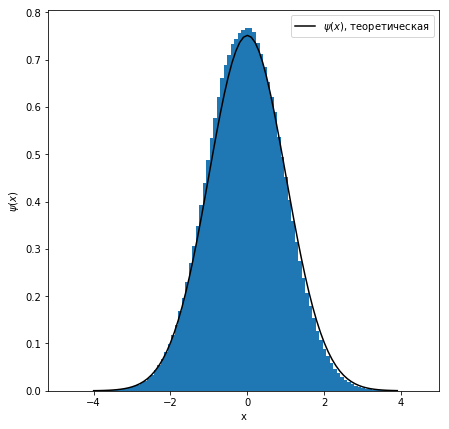

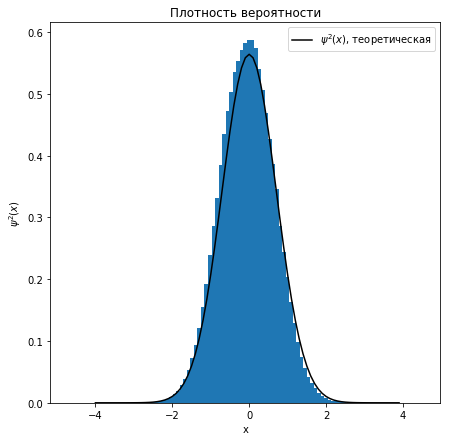

In [16]:
frame10 = frame.drop(frame.index[frame.shape[0]/10:frame.shape[0]])
distr(frame10)

Таким образом, начиная с 500-ой итерации имеем наверняка стационарные данные. Усредним по ним энергию и найдем окончательное распределение.

In [17]:
E = frameNE[frameNE.shape[0]/10:]['E'].mean()
s_E = np.std(frameNE[frameNE.shape[0]/10:]['E'])
print E, s_E

0.494932523778 0.0070004206648


Получаем окончательное значение энергии основного состояния
$$
E = 0.495\pm0.007,
$$
что согласуется с значением $E = 0.5$, вычисленным аналитически.

[ 0.75191256 -0.00655434  0.99787623] [ 0.00052538  0.0008051   0.0008051 ]


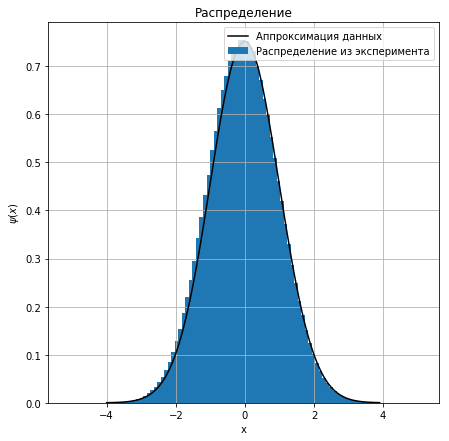

In [18]:
def gauss_function(x, a, x0, s):
    return a*np.exp(-(x-x0)**2/(2*s**2))

def find_psy(df):
    pedestrians, bin_edges = np.histogram(df, 100) 
    norm = integrate_hist(pedestrians*pedestrians, bin_edges)
    psi = pedestrians/np.sqrt(norm)
    
    #Сделаем массив точек (x, y)
    x = [(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(psi))]
    y = psi
    # Теперь фитируем
    popt, pcov = curve_fit(f = gauss_function, 
                                 xdata= x, 
                                 ydata=y, maxfev=10000)
    print popt, np.sqrt(np.diag(pcov))
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = 0.2, label = 'Распределение из эксперимента'.decode('utf-8'))
    plt.plot(np.arange(-4,4,0.1), gauss_function(np.arange(-4,4,0.1), *popt), color = 'black', label = 'Аппроксимация данных'.decode('utf-8'))
    plt.title('Распределение'.decode('utf-8'))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.grid()
    plt.legend()
    plt.show()
    

find_psy(frame[frame.shape[0]/10:])

Получили следующие значения параметров гауссианы:
$$
a = 0.7519\pm0.0005\\
x_0 = -0.0065\pm0.0008\\
\sigma = 0.9978\pm0.0008,\\
$$
таким образом
$$
\psi(x) = 0.7517\cdot e^{-\cfrac{(x+0.0065)^2}{2\cdot0.9978^2}},
$$
что соответствует теоретической зависимосте с высокой точностью
$$
\psi(x) = \cfrac{1}{\pi^{1/4}}\cdot e^{-\cfrac{x^2}{2}}\approx0.7511\cdot e^{-\cfrac{x^2}{2}}.
$$

## Поведение системы без выравнивания потенциала

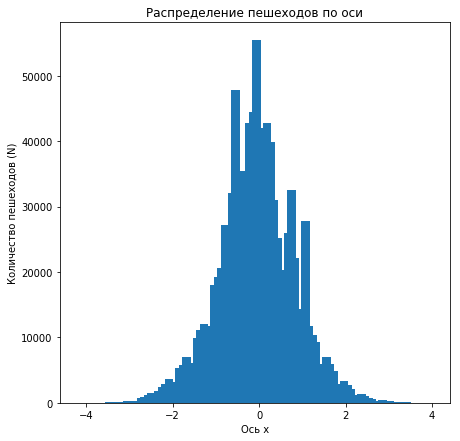

1.0


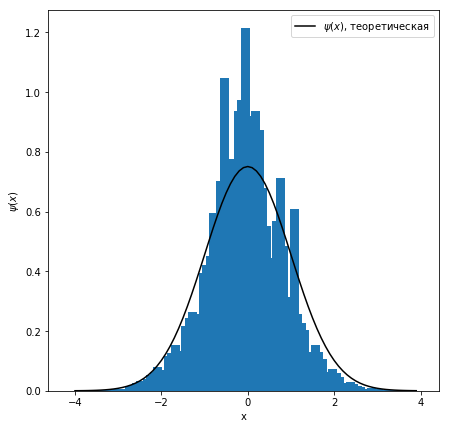

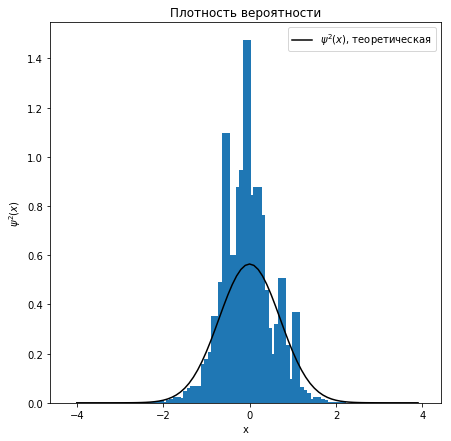

In [35]:
frame_withoutRef = pd.read_csv('output_withoutRef.csv')
distr(frame_withoutRef)

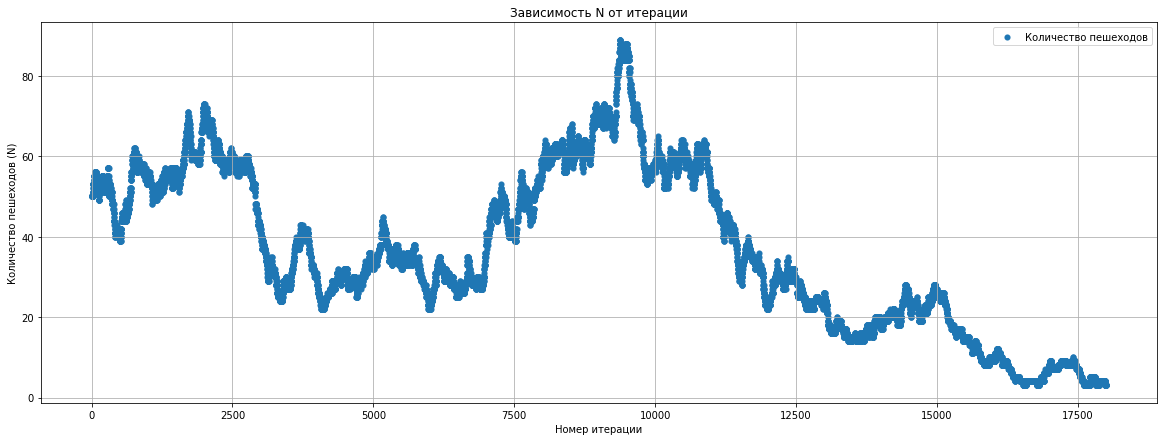

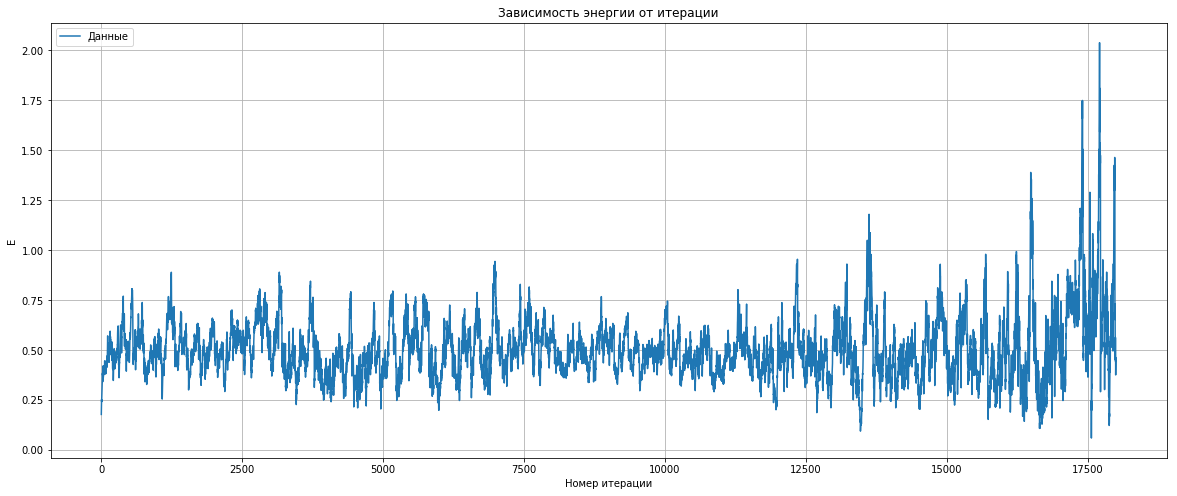

In [36]:
frame_withoutRefNE = pd.read_csv('outputNE_withoutRef.csv')
drawNE(frame_withoutRefNE)

1. Нормировка через площадь, использование одиннаковых данных для гистограмм.✔
2. Усреднение волновой функции (разбиение + аниманиция).✔
3. Двойка при добавлении частицы. ✔
4. Финальная в-на + волновая функция по равновесному состоянию.✔
5. Подумать над смыслом выравнивания потенциала.✔
6. GitLab, Doxygen.

Вопросы:
1. Когда мы добавили новую частицу, нужно ли по ней тоже проходиться алгоритмом внутри одной итерации?
НЕТ! Доаботать.

# Создание анимации

In [17]:
del frame
del frameNE
frame = pd.read_csv('..\data_output\output(1000000x3000)_last300\output.csv')
frameNE = pd.read_csv('..\data_output\output(1000000x3000)_last300\outputNE.csv')

In [25]:
def one_hist(df, num, frame_av):
    pedestrians, bin_edges = np.histogram(df, 1000)
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    
    x = np.arange(-4, 4, 0.1)
    plt.figure(figsize=(10,10))
    plt.bar(bin_edges[:-1], psi_sq, width = bin_edges[1]-bin_edges[0])
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.title('Усреднение по итерациям'.decode('utf-8') + "[" + str(i*frame_av).decode('utf-8') + ":" + str((i+1)*frame_av).decode('utf-8') + "]")
    plt.legend()
    plt.ylim(0,1)
    plt.xlim(-4,4)
    path = './gif/'+'hist'+str(i)+'.png'
    plt.savefig(path)
    plt.close()
    
frame_av = 3
right = 0
for i in range(frameNE[2700:3000]['N'].shape[0]/frame_av):
    left = right
    right += frameNE[2700:3000]['N'][i*frame_av:(i+1)*frame_av].sum()
    one_hist(frame[int(left):int(right)], i + 1, frame_av)

In [52]:
def one_hist(df, num, frame_av, frameNE):
    pedestrians, bin_edges = np.histogram(df, 1000)
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)
    
    x = np.arange(-4, 4, 0.1)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi = 200)
    ax[0][0].bar(bin_edges[:-1], psi_sq, width = bin_edges[1]-bin_edges[0])
    ax[0][0].set_xlabel('x'.decode('utf-8'))
    ax[0][0].set_ylabel('$\psi^2(x)$'.decode('utf-8'))
    ax[0][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[0][0].plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[0][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[0][0].legend()
    ax[0][0].set_ylim(0,1)
    ax[0][0].set_xlim(-4,4)
    
    ax[1][0].bar(bin_edges[:-1], psi, width = bin_edges[1]-bin_edges[0])
    ax[1][0].set_xlabel('x'.decode('utf-8'))
    ax[1][0].set_ylabel('$\psi(x)$'.decode('utf-8'))
    ax[1][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[1][0].plot(x, psi_f(x), color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[1][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[1][0].legend()
    ax[1][0].set_ylim(0,1)
    ax[1][0].set_xlim(-4,4)
    
    ax[0][1].plot(np.arange(frameNE[0:num*frame_av]['E'].shape[0]), frameNE[0:num*frame_av]['E'], label = 'Данные'.decode('utf-8'))
    ax[0][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[0][1].set_ylabel('E'.decode('utf-8'))
    ax[0][1].set_title('Зависимость энергии от итерации'.decode('utf-8'))
    ax[0][1].set_xlim(0,300)
    ax[0][1].set_ylim(0,1)
    ax[0][1].legend()
    ax[0][1].grid()
    
    ax[1][1].scatter(np.arange(frameNE[0:num*frame_av]['N'].shape[0]), frameNE[0:num*frame_av]['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    ax[1][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[1][1].set_ylabel('Количество пешеходов (N)'.decode('utf-8'))
    ax[1][1].set_title('Зависимость N от итерации'.decode('utf-8'))
    ax[1][1].set_xlim(0,300)
    ax[1][1].legend()
    ax[1][1].grid()
    
    path = './gif/'+'hist'+str(num)+'.png'
    
    fig.savefig(path)
    plt.close()
    
    
frame_av = 6
right = 0
for i in range(frameNE[2700:3000]['N'].shape[0]/frame_av):
    left = right
    right += frameNE[2700:3000]['N'][i*frame_av:(i+1)*frame_av].sum()
    one_hist(frame[int(left):int(right)], i + 1, frame_av, frameNE[2700:3000])

Подумаем, что происходит. 

Как мы знаем, энергия основного состояния может быть найдена, как средний потенциал (вывод в книге), т.е. $\langle V\rangle = E$. Мы вводим опорный потенциал, чтобы $E - V_{ref} = 0$ и пси функция не обращалась в 0. Что тогда будем делать?

1. Найдем среднее значение потенциала всех частиц. Возьмем это значение, как опорный потенциал.
2. Сделаем шаг по $x$: сместим частицы на $ds$.
3. Сделаем шаг по времени: в зависимости от знака $\Delta V$ для конкретной частицы добавим новую или удалим.
4. Среднее значение энергии частиц в системе изменилось. Найдем новый опорный потенциал как эту среднюю энергию из формулы (т.к. $\langle V\rangle = V_{ref}$):
$$
\cfrac{N-N_0}{\Delta\tau}=\cfrac{\Delta N}{\Delta\tau} = -[V-V_{ref}]N,
$$
которое следует из части уравнения Шредингера (шаг по координате мы уже сделали) при малом изменении и замене $\psi$ на $N$:
$$
\cfrac{\partial \psi}{\partial \tau} = -[V-V_{ref}]\psi.
$$
Обозначим значение опорного потенциала, который имеем как $V'_{ref}$. Для всей системы имеем:
$$
\cfrac{N-N_0}{\Delta\tau}=\cfrac{\Delta N}{\Delta\tau} = -[\langle V\rangle-V'_{ref}]N \Longrightarrow V_{ref} = \langle V\rangle = V'_{ref}-\cfrac{N-N_0}{N\Delta\tau}.
$$
Видно, что в знаменателе стоит $N$, а не $N_0$. Т.к. эти величины очень близки, не имеет особой разницы, что ставить. Практически проверено, что замена $N_0$ на $N$ не влияет на полученные результаты.

1. 10000 и 5000 поменять местами.
2. Проверить np.std()
3. Сравнить теоретическую функцию и аппроксимацию.
4. Как рисует plt.bar (подумать над смещением).
5. Исправить функцию для анимации.
6. Снова нормировка: что-то не так.

Что было сделано:
1. Исправлена ошибка с учетом родившихся пешеходов.
2. Исправлена ошибка с интексом при удалении пешехода.
Что в итоге?
1. Сдвиг по оси x все еще не изменился.
2. Похоже, в среднем частиц чуть меньше, чем изначально.
3. np.std: The standard deviation is the square root of the average of the squared deviations from the mean, i.e., std = sqrt(mean(abs(x - x.mean())^2)).
4. np.histogram() рахбивает так, что все интервалы, кроме последнего, открыты, т.е. если разбиение есть [1,2,3,4], то бины есть [1,2), [2,3), [3,4].
5. Нормировка работает верно? - Да, даже для 1000 бинов!

0. Уменьшить шаг (или увеличить время моделирования).
1. Посчитать энергию через интегралы (теория и расчет (дискретная! из гистограммы)). Если волн. функции так совпадают, почему же энергии такие разные? + график теория и расчет (линия) на одном.
2. Посчитать хотя бы для одной конфигурации энергию в питоне через данные распределения пешеходов.
3. Потенциал ямы с бесконечными стенками (убиваем пешехода, который вышел за границу).
4. Расчитать энергию 2-го состояния гарм. осц. (бесконечная стенка + гарм. осц.)